In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics, model_selection 
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibrationDisplay
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.1.


In [2]:
df = pd.read_csv('../data/processed_chinese_mnist_part_1.csv').append(
    pd.read_csv('../data/processed_chinese_mnist_part_2.csv')).reset_index(drop = True)

## Prediction task: 0 vs. Not 0

In [3]:
df_binary = df

In [4]:
df_binary.label = df_binary.label.apply(lambda x: 1 if x == 1 else 0)

In [5]:
df_binary.label.value_counts()

0    14000
1     1000
Name: label, dtype: int64

In [6]:
X, y = df_binary.iloc[:,3:], df_binary.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

In [12]:
clf = LogisticRegression(random_state=0, 
                         n_jobs = 16,
                         max_iter = 200,
                         penalty = 'l2',
                         C = 1e6
                        ).fit(X_train, y_train)

/home/j1feng/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
clf.score(X_train, y_train)

0.9926666666666667

In [15]:
clf.score(X_test, y_test)

0.8783333333333333

/home/j1feng/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


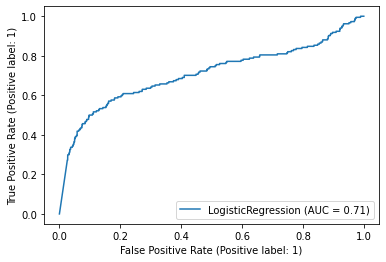

In [16]:
metrics.plot_roc_curve(clf, X_test, y_test) 
plt.show()

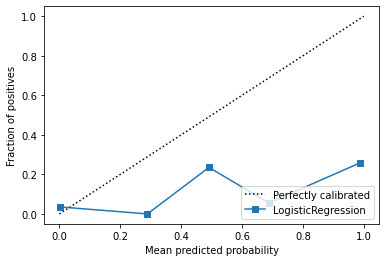

In [17]:
disp = CalibrationDiasplay.from_estimator(clf, X_test, y_test)
plt.show()

In [18]:
clf_with_penalty_max_iter = LogisticRegression(random_state=0, 
                         n_jobs = 16,
                         max_iter = 1000,
                        ).fit(X_train, y_train)

/home/j1feng/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
clf_with_penalty_max_iter.score(X_train, y_train)

1.0

In [20]:
clf_with_penalty_max_iter.score(X_test, y_test)

0.908

/home/j1feng/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


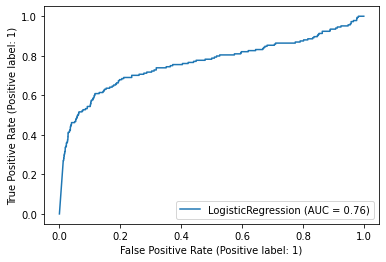

In [21]:
metrics.plot_roc_curve(clf_with_penalty_max_iter, X_test, y_test) 
plt.show()

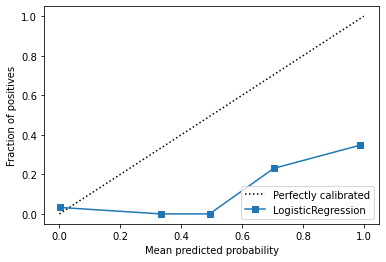

In [24]:
disp = CalibrationDisplay.from_estimator(clf_with_penalty_max_iter, X_test, y_test)
plt.show()